#### Context
Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

Try to find coherent clusters of customers. Look into each of your clusters to see if you can imagine a Persona linked to your clustered customers.

Source : [Kaggle](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering)

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

### Use all features

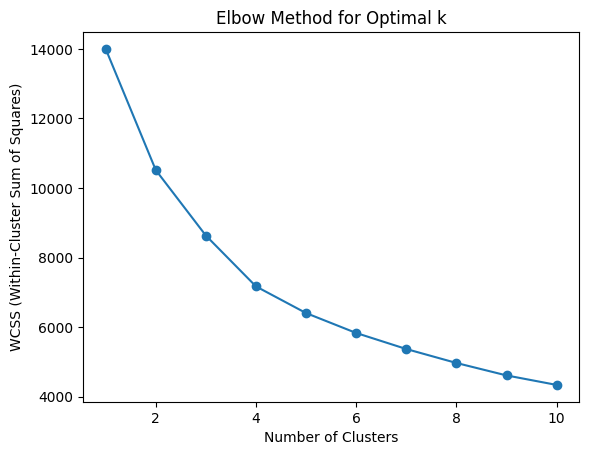

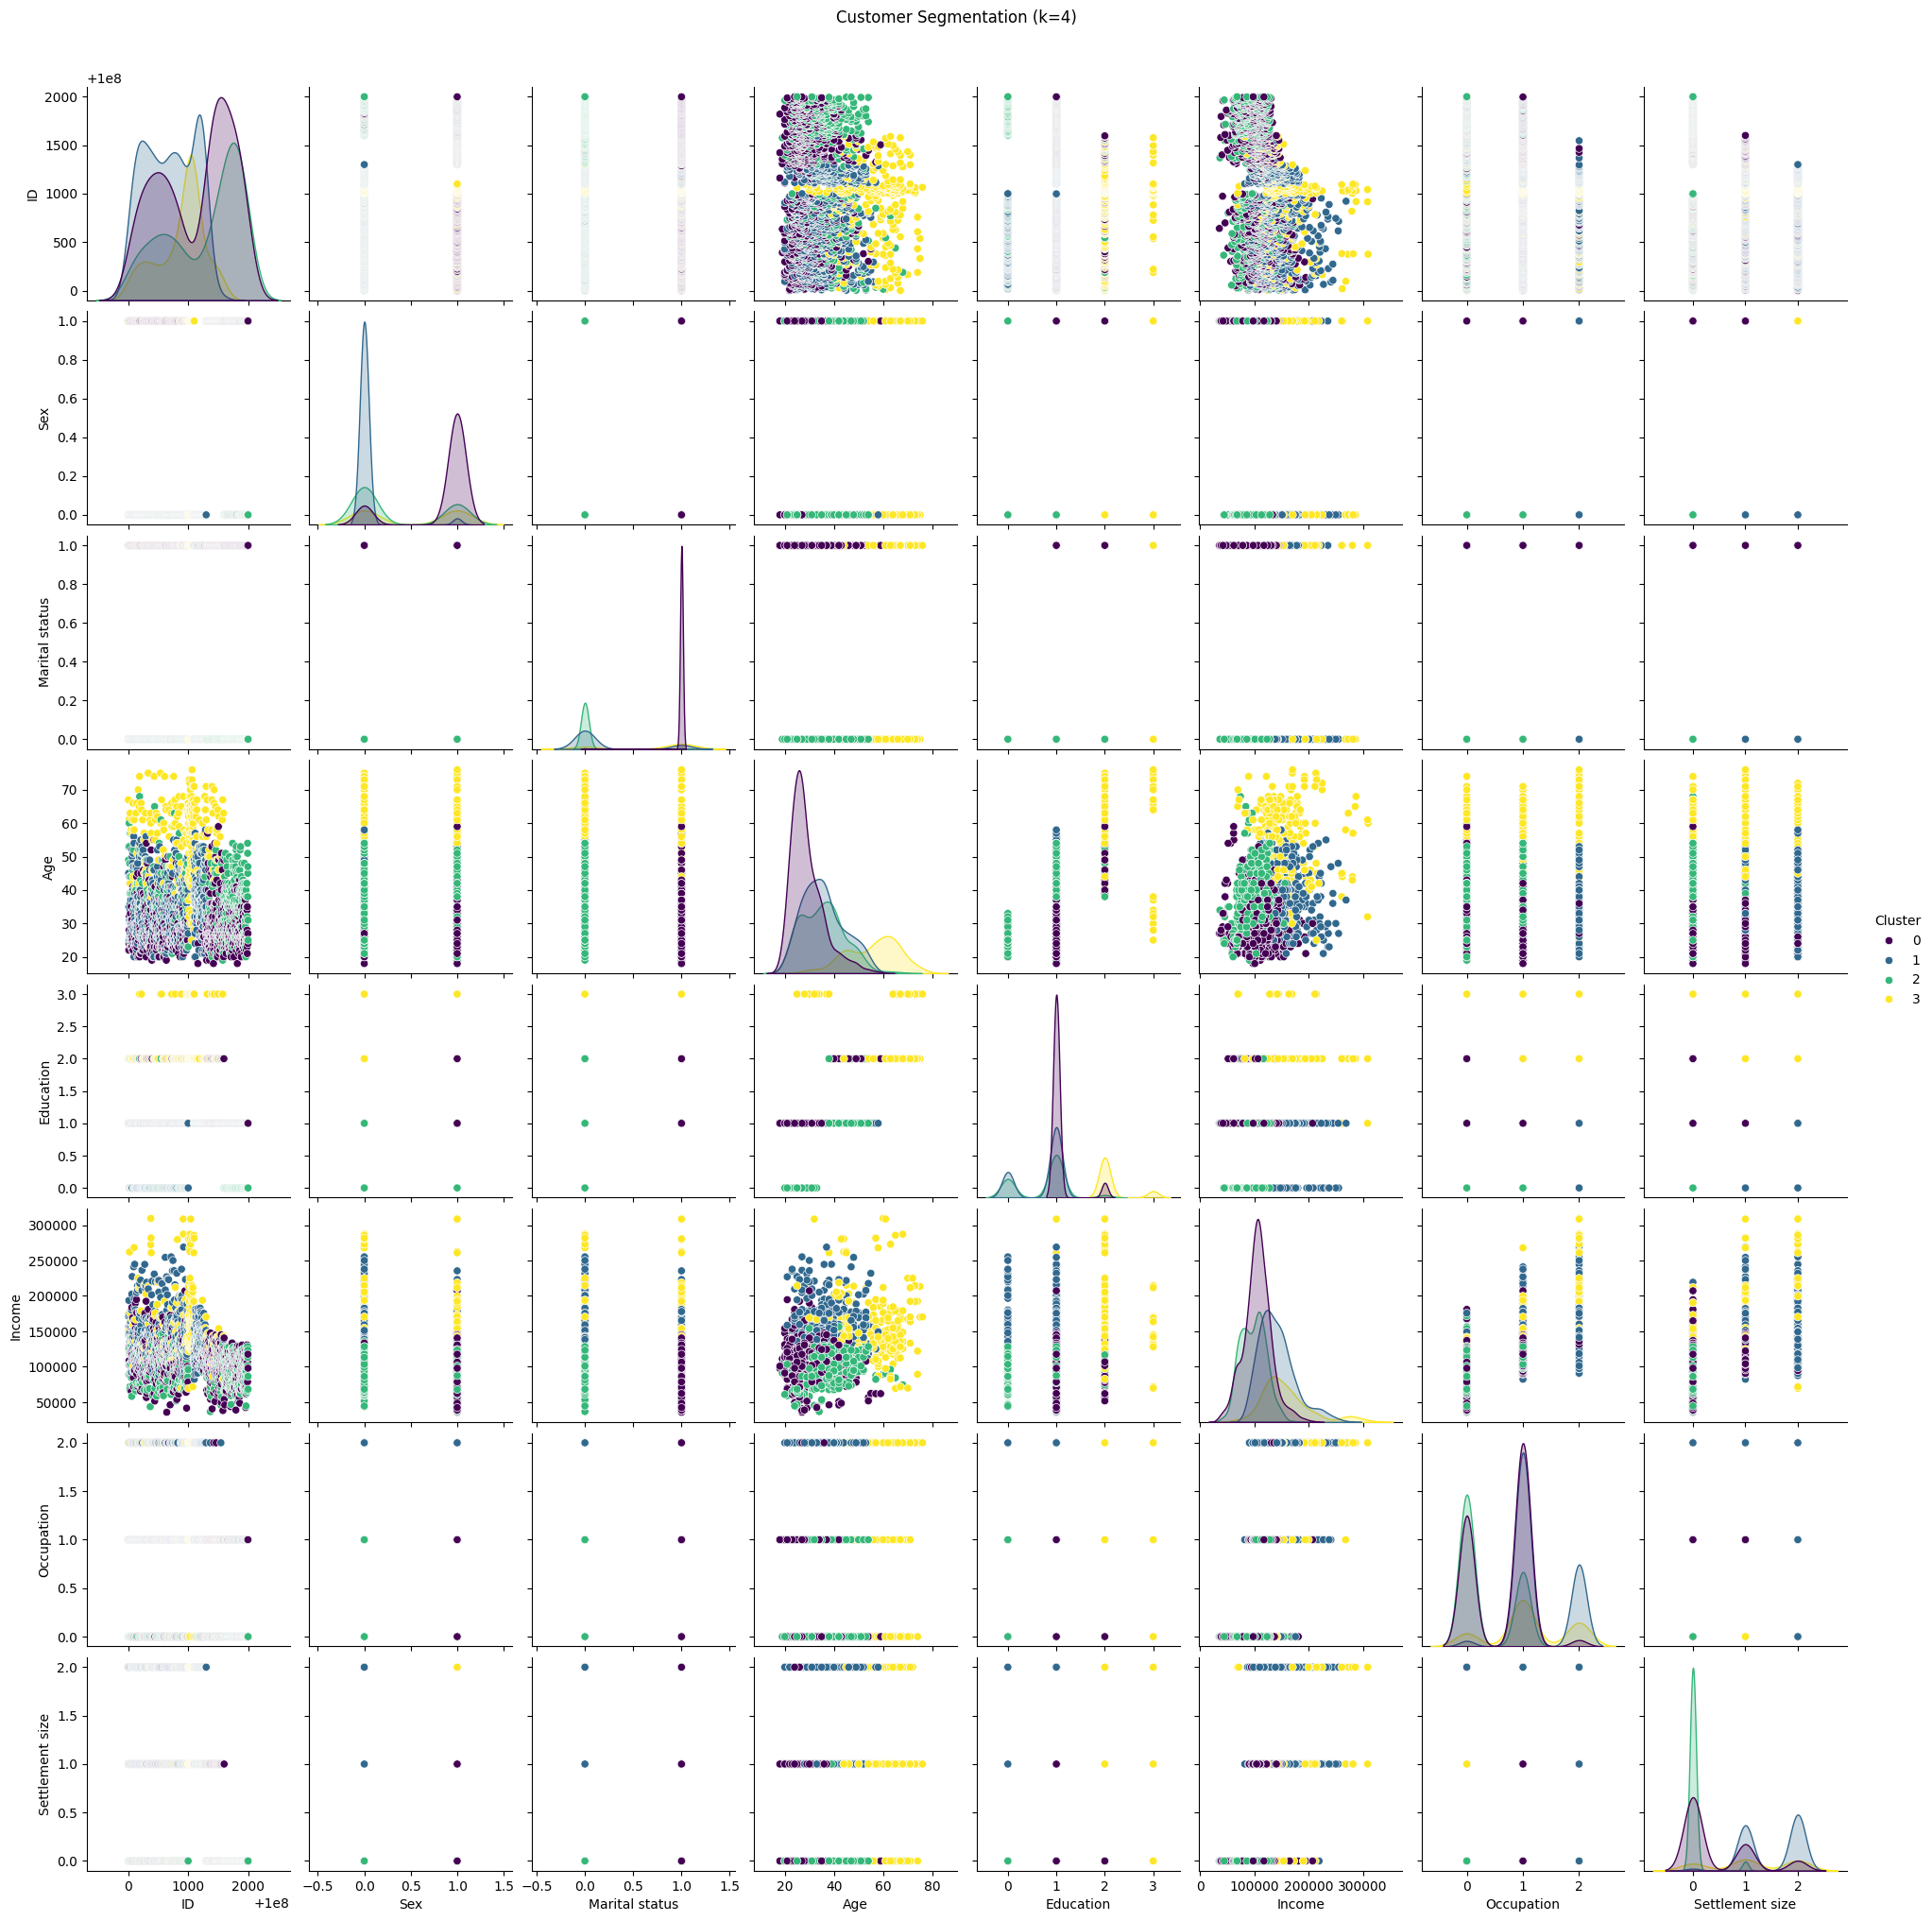

Silhouette Score: 0.26879180394522123
  Cluster        Age                    Income               Occupation  \
                mean        std           mean           std   <lambda>   
0       0  28.963121   6.751582  105759.119149  25370.288131          1   
1       1  35.635088   8.501018  141218.249123  33459.299686          1   
2       2  35.577922   8.749180   97859.852814  22950.837099          0   
3       3  55.703422  10.502066  158338.422053  46204.670732          1   

  Settlement size      Sex Marital status Education    ID  
         <lambda> <lambda>       <lambda>  <lambda> count  
0               0        1              1         1   705  
1               2        0              0         1   570  
2               0        0              0         1   462  
3               1        1              1         2   263  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
# Replace 'path/to/your/dataset.csv' with the actual path to your dataset
data_path = 'data.csv'
df = pd.read_csv(data_path)

# Select relevant features for clustering
selected_features = ['Age', 'Income', 'Occupation', 'Settlement size', 'Sex', 'Marital status', 'Education']
X = df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, let's choose the optimal number of clusters (k)
optimal_k = 4

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle(f'Customer Segmentation (k={optimal_k})', y=1.02)
plt.show()

# Evaluate the silhouette score to assess the clustering quality
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'Occupation': lambda x: x.value_counts().index[0],
    'Settlement size': lambda x: x.value_counts().index[0],
    'Sex': lambda x: x.value_counts().index[0],
    'Marital status': lambda x: x.value_counts().index[0],
    'Education': lambda x: x.value_counts().index[0],
    'ID': 'count'
}).reset_index()

print(cluster_summary)


### Select only 'Age', 'Income', 'Occupation', 'Settlement size

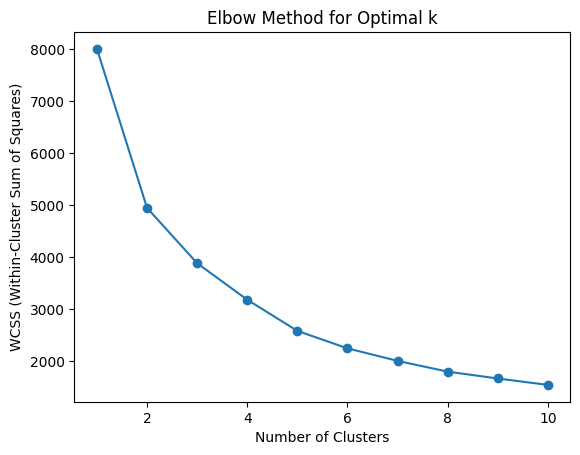

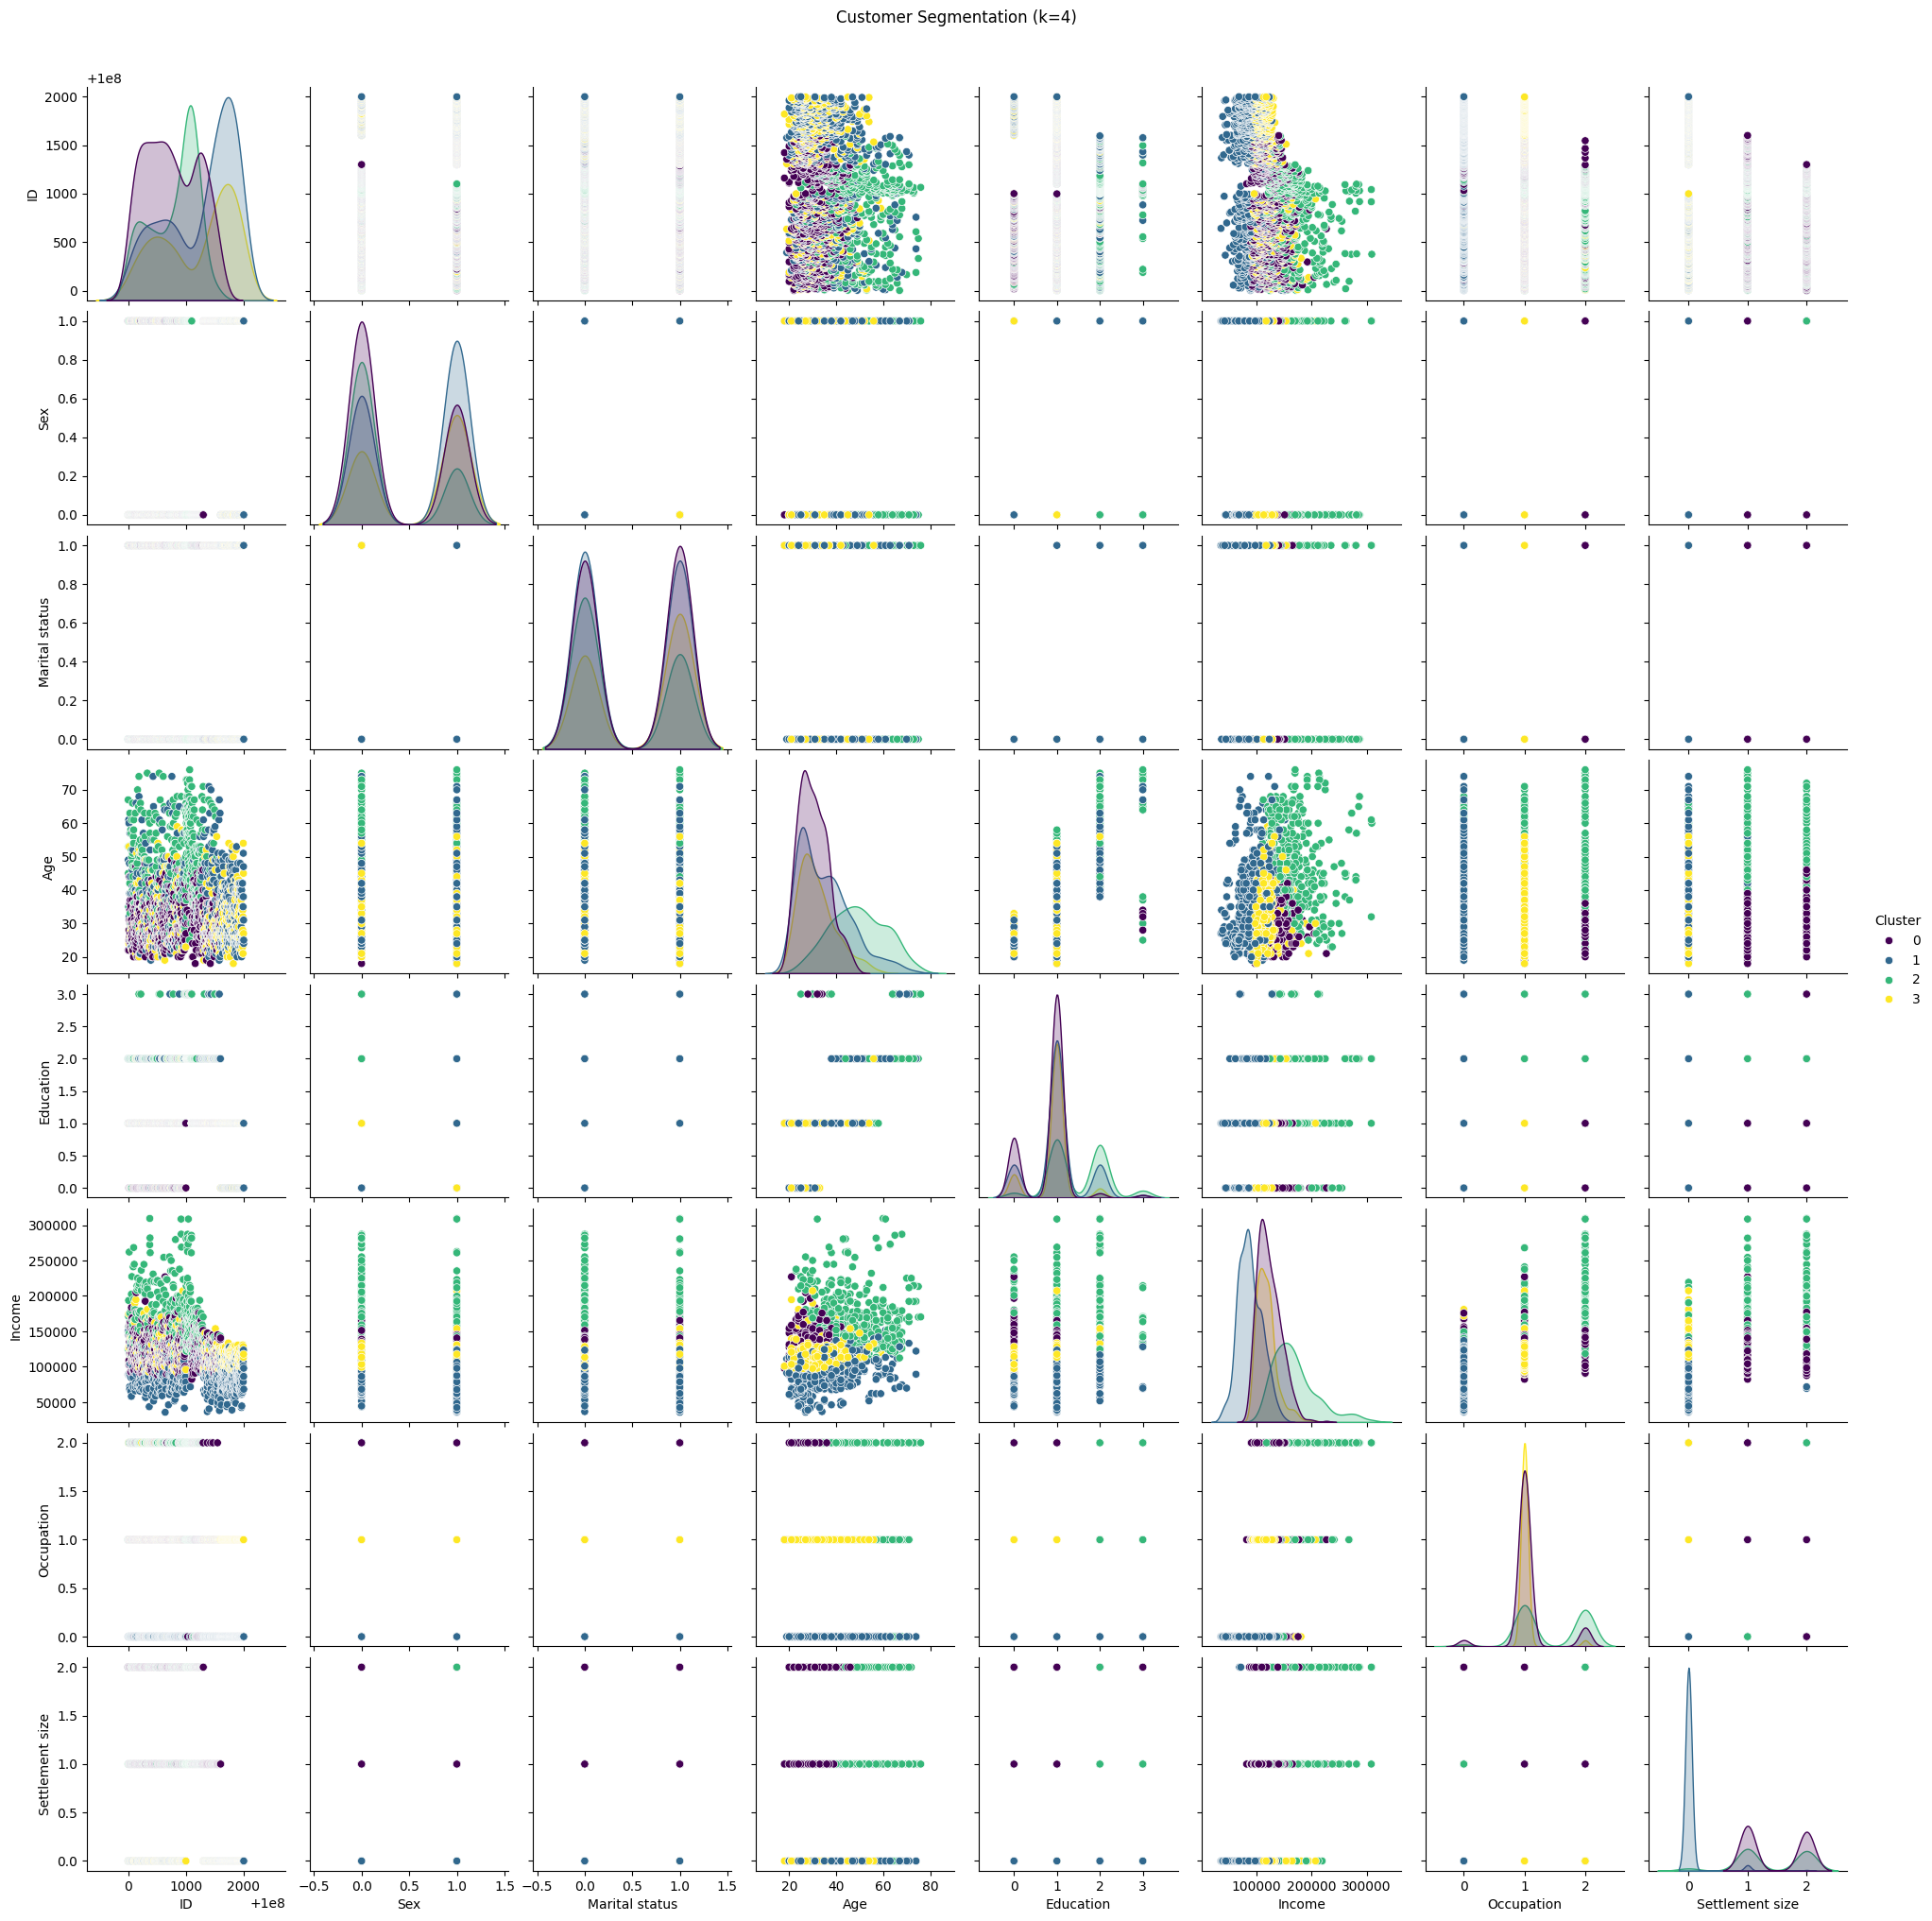

Silhouette Score: 0.32902807299722275
  Cluster        Age                    Income               Occupation  \
                mean        std           mean           std   <lambda>   
0       0  30.349754   6.229506  122916.581281  21163.142802          1   
1       1  35.112957  11.073970   88393.880399  21295.275704          0   
2       2  49.239506  11.726437  169009.738272  40096.154124          1   
3       3  31.914062   7.981729  118204.635417  18422.832860          1   

  Settlement size    ID  
         <lambda> count  
0               1   609  
1               0   602  
2               1   405  
3               0   384  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data_path = 'data.csv'
df = pd.read_csv(data_path)

# Select relevant features for clustering (age, income, occupation, and settlement size)
selected_features = ['Age', 'Income', 'Occupation', 'Settlement size']
X = df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, let's choose the optimal number of clusters (k)
optimal_k = 4

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle(f'Customer Segmentation (k={optimal_k})', y=1.02)
plt.show()

# Evaluate the silhouette score to assess the clustering quality
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'Occupation': lambda x: x.value_counts().index[0],
    'Settlement size': lambda x: x.value_counts().index[0],
    'ID': 'count'
}).reset_index()

print(cluster_summary)


### The silhouette score 
- is a measure of how well-separated the clusters are. A higher silhouette score indicates better-defined clusters.
- using the silhouette_score function from scikit-learn
- using the scaled feature data (X_scaled) and the cluster labels assigned by K-Means

In [2]:
# Evaluate the silhouette score to assess the clustering quality
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.32902807299722275


### Improve silhouette score
- Feature scalling: standardize / normalize the data before applying clustering algorithms
- Feature selection
- Choosing k  - numer of clusters
- Use other algorithms: DBSCAN, Agglomerative HierachicalClustering, Gaussian Mixture models
- Check outline
- Check feature engineer: combine/ transform existing features
- Hyperparameter Tuning
- Visualize and interpretation
- Ensemble clustering

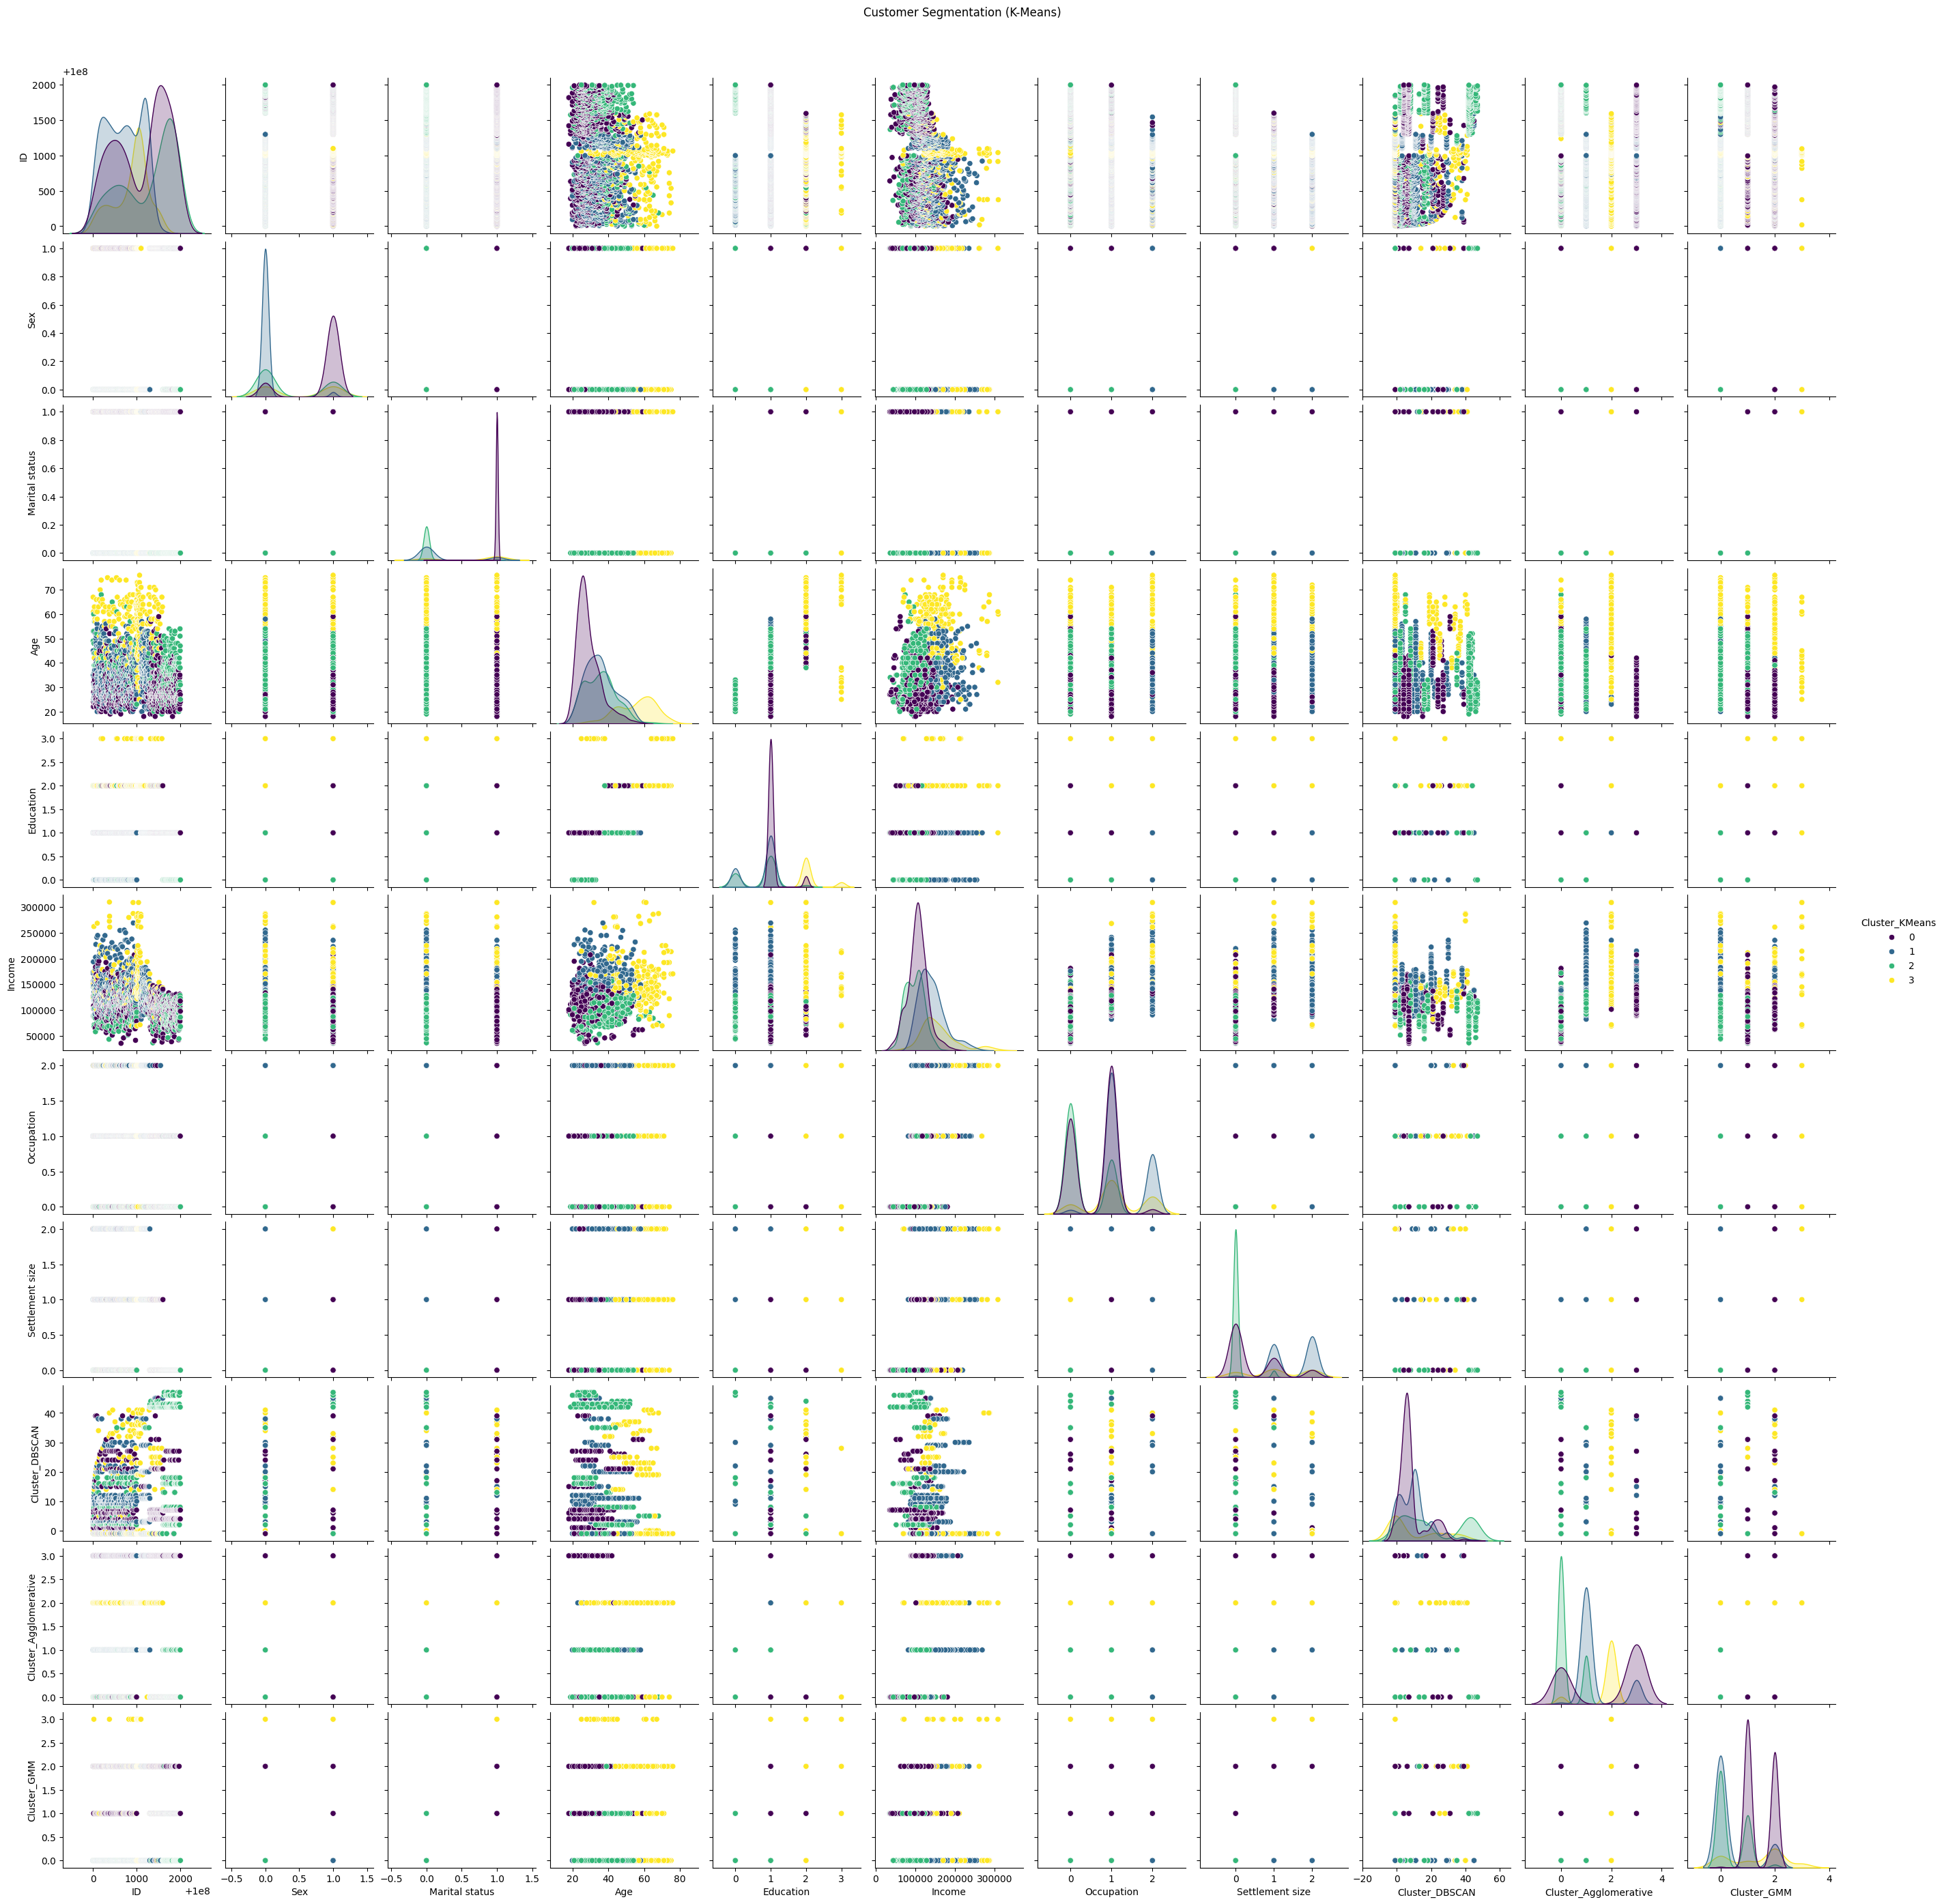

Silhouette Score (KMeans): 0.26879180394522123
Silhouette Score (DBSCAN): 0.35130178924196526
Silhouette Score (Agglomerative): 0.25080894270462684
Silhouette Score (GMM): 0.19753932980493197
  Cluster_KMeans        Age                    Income                \
                       mean        std           mean           std   
0              0  28.963121   6.751582  105759.119149  25370.288131   
1              1  35.635088   8.501018  141218.249123  33459.299686   
2              2  35.577922   8.749180   97859.852814  22950.837099   
3              3  55.703422  10.502066  158338.422053  46204.670732   

  Occupation Settlement size      Sex Marital status Education    ID  
    <lambda>        <lambda> <lambda>       <lambda>  <lambda> count  
0          1               0        1              1         1   705  
1          1               2        0              0         1   570  
2          0               0        0              0         1   462  
3          1              

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
data_path = 'data.csv'
df = pd.read_csv(data_path)

# Select relevant features for clustering
selected_features = ['Age', 'Income', 'Occupation', 'Settlement size', 'Sex', 'Marital status', 'Education']
X = df[selected_features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dictionary to store silhouette scores for each algorithm
silhouette_scores = {}

# K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)
silhouette_scores['KMeans'] = silhouette_score(X_scaled, df['Cluster_KMeans'])

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)
silhouette_scores['DBSCAN'] = silhouette_score(X_scaled, df['Cluster_DBSCAN'])

# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Cluster_Agglomerative'] = agg_cluster.fit_predict(X_scaled)
silhouette_scores['Agglomerative'] = silhouette_score(X_scaled, df['Cluster_Agglomerative'])

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=4, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)
silhouette_scores['GMM'] = silhouette_score(X_scaled, df['Cluster_GMM'])

# Visualize the clusters for K-Means (you can do similar for other algorithms)
sns.pairplot(df, hue='Cluster_KMeans', palette='viridis')
plt.suptitle('Customer Segmentation (K-Means)', y=1.02)
plt.show()

# Print silhouette scores for each algorithm
for algorithm, score in silhouette_scores.items():
    print(f"Silhouette Score ({algorithm}): {score}")

# Analyze the characteristics of each cluster (you can do similar for other algorithms)
cluster_summary_kmeans = df.groupby('Cluster_KMeans').agg({
    'Age': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'Occupation': lambda x: x.value_counts().index[0],
    'Settlement size': lambda x: x.value_counts().index[0],
    'Sex': lambda x: x.value_counts().index[0],
    'Marital status': lambda x: x.value_counts().index[0],
    'Education': lambda x: x.value_counts().index[0],
    'ID': 'count'
}).reset_index()

print(cluster_summary_kmeans)


## Process data before clustering

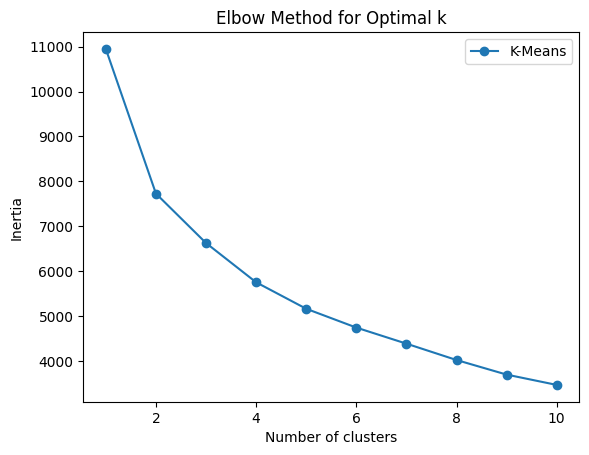

Silhouette Score (K-Means): 0.21548893111117043
Silhouette Score (Agglomerative): 0.17552209472937633
Silhouette Score (DBSCAN): 0.336367273999225
Silhouette Score (Birch): 0.18885517045151726


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the wine dataset
data_path = 'data.csv'
wine_data = pd.read_csv(data_path)

# Select relevant features for clustering
selected_features = wine_data.columns
X = wine_data[selected_features]

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define categorical and numerical columns
categorical_columns = ['Sex', 'Marital status', 'Education']
numerical_columns = ['Age', 'Income', 'Occupation', 'Settlement size']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply preprocessing to the selected features
X_transformed = preprocessor.fit_transform(X_imputed)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Find the optimal number of clusters using the Elbow Method for K-Means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_transformed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph for K-Means
plt.plot(range(1, 11), inertia, marker='o', label='K-Means')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Based on the Elbow Method, let's choose the optimal number of clusters (k) for K-Means
optimal_k_kmeans = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k_kmeans, init='k-means++', max_iter=300, n_init=10, random_state=42)
wine_data['Cluster_KMeans'] = kmeans.fit_predict(X_transformed)

# Evaluate K-Means clustering
silhouette_avg_kmeans = silhouette_score(X_transformed, wine_data['Cluster_KMeans'])
print(f"Silhouette Score (K-Means): {silhouette_avg_kmeans}")

# Apply Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
wine_data['Cluster_Agglomerative'] = agg_cluster.fit_predict(X_transformed)

# Evaluate Agglomerative Hierarchical Clustering
silhouette_avg_agg = silhouette_score(X_transformed, wine_data['Cluster_Agglomerative'])
print(f"Silhouette Score (Agglomerative): {silhouette_avg_agg}")

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_data['Cluster_DBSCAN'] = dbscan.fit_predict(X_transformed)

# Evaluate DBSCAN clustering if there are more than one unique label
unique_labels_dbscan = np.unique(wine_data['Cluster_DBSCAN'])
if len(unique_labels_dbscan) > 1:
    silhouette_avg_dbscan = silhouette_score(X_transformed, wine_data['Cluster_DBSCAN'])
    print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
else:
    print("DBSCAN clustering does not have enough unique labels for silhouette score.")

# Apply Birch clustering
birch = Birch(n_clusters=3)
wine_data['Cluster_Birch'] = birch.fit_predict(X_transformed)

# Evaluate Birch clustering
silhouette_avg_birch = silhouette_score(X_transformed, wine_data['Cluster_Birch'])
print(f"Silhouette Score (Birch): {silhouette_avg_birch}")

# Apply Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, random_state=42)
wine_data['Cluster_GMM'] = gmm.fit_predict(X_transformed)

# Evaluate Gaussian Mixture Models if there are
